In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sunRay.parameters import c,c_r,R_S  # physics parameters
from scipy import integrate

In [12]:

data_set  = np.load('../RUN3/harmo/RUN_[eps0.402]_[alpha0.99].lv1.npz')

In [13]:
dir(data_set.f)

['anis',
 'asym',
 'collect_N',
 'epsilon',
 'f_ratio',
 'freq0',
 'k_vec_0',
 'k_vec_stat_avail',
 'omega0',
 'photon_N',
 'r_vec_0',
 'r_vec_stat_avail',
 'start_phi',
 'start_r',
 'start_theta',
 'steps_N',
 't_reach_stat_avail',
 'tau_stat_avail']

In [14]:
# collect the data
anis  = data_set.f.anis
asym  = data_set.f.asym
collect_N  = data_set.f.collect_N
epsilon  = data_set.f.epsilon
f_ratio  = data_set.f.f_ratio
freq0  = data_set.f.freq0
k_vec_0  = data_set.f.k_vec_0
k_vec_stat_avail  = data_set.f.k_vec_stat_avail
omega0  = data_set.f.omega0
photon_N  = data_set.f.photon_N
r_vec_0  = data_set.f.r_vec_0
r_vec_stat_avail  = data_set.f.r_vec_stat_avail
start_phi  = data_set.f.start_phi
start_r  = data_set.f.start_r
start_theta  = data_set.f.start_theta
steps_N  = data_set.f.steps_N
t_reach_stat_avail  = data_set.f.t_reach_stat_avail
tau_stat_avail  = data_set.f.tau_stat_avail

In [15]:
import sunRay.statisticalRays as raystat

In [16]:

ang_rot = 0

# Important !!! rotate the initial point
r_vec_rot,k_vec_rot = raystat.rotateCoordKX(r_vec_stat_avail,k_vec_stat_avail,-ang_rot*np.pi/180)
r_vec0_rot,k_vec0_rot = raystat.rotateCoordKX(r_vec_0,k_vec_0,-ang_rot*np.pi/180)


In [17]:

(x_im_stat,y_im_stat,t_reach_1au_stat,weights_stat,t_free_stat
    )=raystat.ImgXYtEstimate(r_vec_rot,k_vec_rot,t_reach_stat_avail,
            tau_stat_avail,r_vec0_rot, k_vec0_rot,num_t_bins=60)

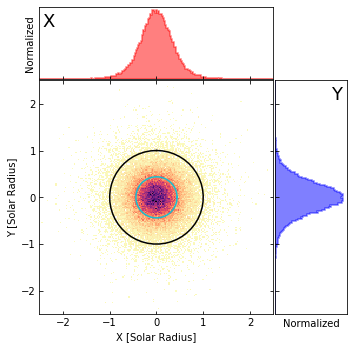

In [18]:
#hst = plt.hist2d(x_im_stat,y_im_stat,bins=[np.linspace(-2,2,100),np.linspace(-2,2,100)],weights=np.exp(-tau_stat))
#plt.axis('equal')
from sunRay.showPlot import XYDistributionImageHist

XYDistributionImageHist(x_im_stat,y_im_stat,bins_data=np.linspace(-2.5,2.5,200)
            ,weights_data=weights_stat)

/home/amax/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amax/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.49776668070885677


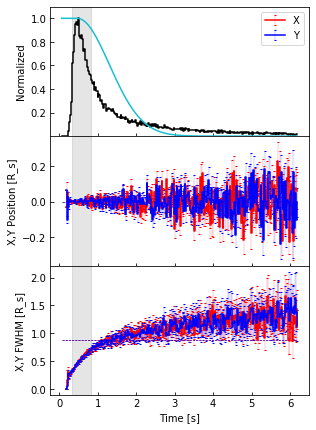

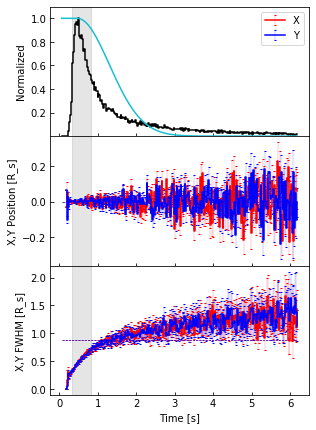

In [19]:
from sunRay.showPlot import XYVariationPlot

XYVariationPlot(x_im_stat,y_im_stat,t_reach_1au_stat,weights_stat,num_t_bins = 300)

In [10]:
f_ratio

array(2)